Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
# Importing requried library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step No. 1 Data Selection

In [2]:
#importing dataset

df = pd.read_csv("Flight Price prediction.csv")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.head()  #showing first five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()  #showing last five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
df.shape #Dimension of dataset

(10683, 11)

There are 10683 rows and 11 columns present in dataset.

In [7]:
pd.set_option('display.max_rows',None)

pd.set_option('display.max_rows',None) - main purpose of using this is it will display all rows (if more than 10 rows) instead of first 5 and last 5.

In [8]:
df.info()  #information about dataset like data type, Null values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.dtypes   #datatype

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Only price has integer type dataset, Rest has object dataset.

In [10]:
df.isnull().sum()  #to check for null value.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route and Total_stops has null value.

<AxesSubplot:>

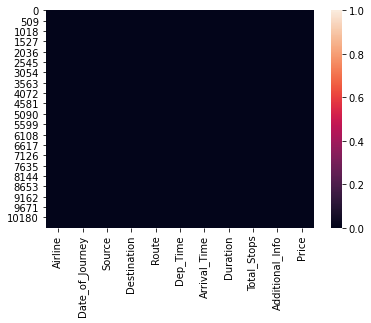

In [11]:
#Let's visualized null values.

sns.heatmap(df.isnull())

# Step 2. Data Transformation

In [12]:
df['Total_Stops'].fillna(df['Total_Stops'].mode(),inplace=True)

In [13]:
df['Total_Stops'].replace(['non-stop','0 stop','1 stop', '2 stops', '3 stops', '4 stops'],[0,1,2,3,4,5],inplace=True)

In [14]:
df = df.drop(columns=['Route']) #removing unnecessary columns

In [15]:
from sklearn.preprocessing import LabelEncoder #importing required library.

In [16]:
lab_enc = LabelEncoder()  #storing LabelEncoder in lab_enc.

In [17]:
df1 = lab_enc.fit_transform(df['Airline']) #storing region dataset into df1.

In [18]:
df2 = lab_enc.fit_transform(df['Date_of_Journey']) #storing region dataset into df2.

In [19]:
df3 = lab_enc.fit_transform(df['Source']) #storing region dataset into df3.

In [20]:
df4 = lab_enc.fit_transform(df['Destination']) #storing region dataset into df4.

In [21]:
df6= lab_enc.fit_transform(df['Dep_Time']) #storing region dataset into df6.

In [22]:
df7= lab_enc.fit_transform(df['Arrival_Time']) #storing region dataset into df7.

In [23]:
df8= lab_enc.fit_transform(df['Duration']) #storing region dataset into df8.

In [24]:
df10= lab_enc.fit_transform(df['Additional_Info']) #storing region dataset into df10.

In [25]:
pd.Series(df1)

0         3
1         1
2         4
3         3
4         3
5         8
6         4
7         4
8         4
9         6
10        1
11        3
12        1
13        4
14        3
15        1
16        8
17        4
18        1
19        4
20        2
21        1
22        3
23        3
24        4
25        4
26        3
27        2
28       10
29       10
30       10
31        1
32        3
33        4
34        4
35        3
36        8
37        1
38        4
39        4
40        6
41        1
42        4
43        0
44        6
45        8
46        3
47        1
48        1
49        4
50        4
51        4
52        3
53        3
54        0
55        4
56        1
57       10
58        6
59       10
60        1
61        1
62        6
63        3
64       10
65        3
66       10
67        1
68        1
69        3
70        4
71        4
72        6
73        4
74        3
75       10
76        2
77        3
78        4
79        8
80        4
81        4
82        4
83  

In [26]:
pd.Series(df2)

0        24
1         6
2        43
3        10
4         0
5        27
6         8
7         0
8         8
9        30
10        7
11       17
12       27
13       42
14       25
15       32
16       13
17       11
18       11
19       30
20       36
21       20
22       33
23        6
24       38
25       43
26        7
27       14
28       19
29       15
30       19
31        6
32       37
33       15
34       18
35       31
36       22
37       18
38        2
39       35
40       22
41       12
42       18
43       38
44       20
45       24
46       30
47       34
48       14
49       31
50       40
51        6
52       24
53       19
54       33
55       24
56        0
57       36
58       38
59       36
60       39
61       33
62       35
63       14
64       26
65       27
66       25
67       38
68       22
69        8
70        7
71        3
72       27
73       27
74       20
75        3
76       33
77       33
78       15
79       20
80       43
81       24
82       38
83  

In [27]:
pd.Series(df3)

0        0
1        3
2        2
3        3
4        0
5        3
6        0
7        0
8        0
9        2
10       2
11       3
12       1
13       3
14       3
15       2
16       2
17       2
18       2
19       2
20       2
21       0
22       0
23       0
24       3
25       2
26       2
27       2
28       0
29       1
30       1
31       3
32       0
33       2
34       2
35       2
36       3
37       3
38       0
39       2
40       2
41       0
42       2
43       0
44       2
45       0
46       0
47       1
48       3
49       2
50       2
51       3
52       0
53       0
54       0
55       3
56       0
57       1
58       2
59       4
60       3
61       2
62       2
63       2
64       1
65       2
66       0
67       4
68       2
69       1
70       4
71       0
72       2
73       2
74       2
75       0
76       0
77       4
78       2
79       1
80       3
81       0
82       3
83       2
84       2
85       0
86       2
87       2
88       3
89       3
90       2

In [28]:
pd.Series(df4)

0        5
1        0
2        1
3        0
4        5
5        0
6        5
7        5
8        5
9        1
10       1
11       0
12       4
13       0
14       0
15       1
16       1
17       1
18       1
19       1
20       1
21       5
22       2
23       2
24       0
25       1
26       1
27       1
28       2
29       4
30       4
31       0
32       2
33       1
34       1
35       1
36       0
37       0
38       5
39       1
40       1
41       5
42       1
43       2
44       1
45       5
46       2
47       4
48       0
49       1
50       1
51       0
52       5
53       2
54       2
55       0
56       5
57       4
58       1
59       3
60       0
61       1
62       1
63       1
64       4
65       1
66       2
67       3
68       1
69       4
70       3
71       5
72       1
73       1
74       1
75       5
76       2
77       3
78       1
79       4
80       0
81       5
82       0
83       1
84       1
85       5
86       1
87       1
88       0
89       0
90       1

In [29]:
pd.Series(df6)

0        211
1         31
2         70
3        164
4        149
5         66
6        172
7         55
8         65
9         91
10        74
11       188
12        94
13       198
14       154
15       147
16        63
17       118
18       187
19       141
20       120
21       207
22        16
23       172
24       172
25       201
26       205
27        45
28        74
29        46
30        46
31        75
32        16
33       125
34        46
35        83
36       130
37       121
38        45
39        46
40        46
41        42
42       195
43        88
44        66
45        30
46        16
47        94
48       173
49       218
50        86
51        72
52       211
53       199
54       221
55       181
56        64
57        46
58       173
59       137
60        70
61        34
62        63
63       129
64        46
65        83
66        74
67       117
68        32
69       111
70        46
71        30
72        94
73       218
74        23
75        75
76        94

In [30]:
pd.Series(df7)

0         233
1         906
2         413
3        1324
4        1237
5         830
6         742
7         463
8         742
9        1124
10       1287
11       1280
12        934
13        659
14       1158
15       1129
16        906
17        889
18       1137
19        895
20       1148
21        918
22        489
23       1240
24        584
25        887
26        380
27        899
28        877
29        653
30        653
31       1301
32        489
33        890
34        877
35       1217
36       1175
37       1011
38        906
39       1093
40       1042
41        973
42       1105
43        934
44       1217
45        601
46        489
47        934
48        803
49       1109
50        939
51        782
52        235
53         70
54        354
55        852
56       1341
57        653
58        276
59       1012
60       1240
61        670
62       1093
63        282
64        653
65       1217
66        877
67        978
68       1124
69        980
70        600
71    

In [31]:
pd.Series(df8)

0        240
1        336
2        106
3        311
4        303
5        235
6         65
7        145
8        185
9        341
10        38
11       237
12       233
13        25
14       237
15       198
16       300
17       151
18       156
19       128
20       308
21        63
22       240
23       241
24        39
25        61
26       315
27       317
28       240
29       233
30       233
31        40
32       240
33       146
34       312
35         4
36       309
37       236
38       322
39        22
40        23
41       349
42       155
43       239
44        24
45       240
46       240
47       233
48        83
49       116
50       282
51       183
52       240
53       280
54       240
55        74
56        71
57       233
58       325
59       191
60        28
61       206
62         2
63         5
64       233
65         4
66       240
67       121
68        39
69       233
70       120
71       197
72       335
73        41
74       307
75       239
76       240

In [32]:
pd.Series(df10)

0        8
1        8
2        8
3        8
4        8
5        8
6        5
7        8
8        5
9        8
10       8
11       8
12       8
13       5
14       8
15       8
16       8
17       5
18       8
19       5
20       8
21       8
22       8
23       8
24       5
25       8
26       8
27       8
28       8
29       8
30       8
31       8
32       8
33       5
34       5
35       8
36       8
37       8
38       8
39       8
40       8
41       8
42       5
43       8
44       8
45       7
46       8
47       8
48       8
49       5
50       5
51       8
52       8
53       8
54       8
55       8
56       8
57       8
58       8
59       8
60       8
61       8
62       8
63       8
64       8
65       8
66       8
67       8
68       8
69       8
70       8
71       5
72       5
73       8
74       8
75       8
76       8
77       8
78       5
79       7
80       5
81       8
82       8
83       8
84       8
85       5
86       8
87       8
88       5
89       5
90       8

In [33]:
df['Airline']=df1  #storing dataset in df
df['Date_of_Journey']=df2
df['Source']=df3
df['Destination']=df4
df['Dep_Time']=df6
df['Arrival_Time']=df7
df['Duration']=df8
df['Additional_Info']=df10

In [34]:
df.head(10) #dataset after converting string values into intger values.

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,211,233,240,0.0,8,3897
1,1,6,3,0,31,906,336,3.0,8,7662
2,4,43,2,1,70,413,106,3.0,8,13882
3,3,10,3,0,164,1324,311,2.0,8,6218
4,3,0,0,5,149,1237,303,2.0,8,13302
5,8,27,3,0,66,830,235,0.0,8,3873
6,4,8,0,5,172,742,65,2.0,5,11087
7,4,0,0,5,55,463,145,2.0,8,22270
8,4,8,0,5,65,742,185,2.0,5,11087
9,6,30,2,1,91,1124,341,2.0,8,8625


In [35]:
df['Airline'].value_counts() ##gives count

4     3849
3     2053
1     1752
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In above outcome shows respective Airline and its counts.

In [36]:
data = df['Airline'].value_counts()  #storing values in data 

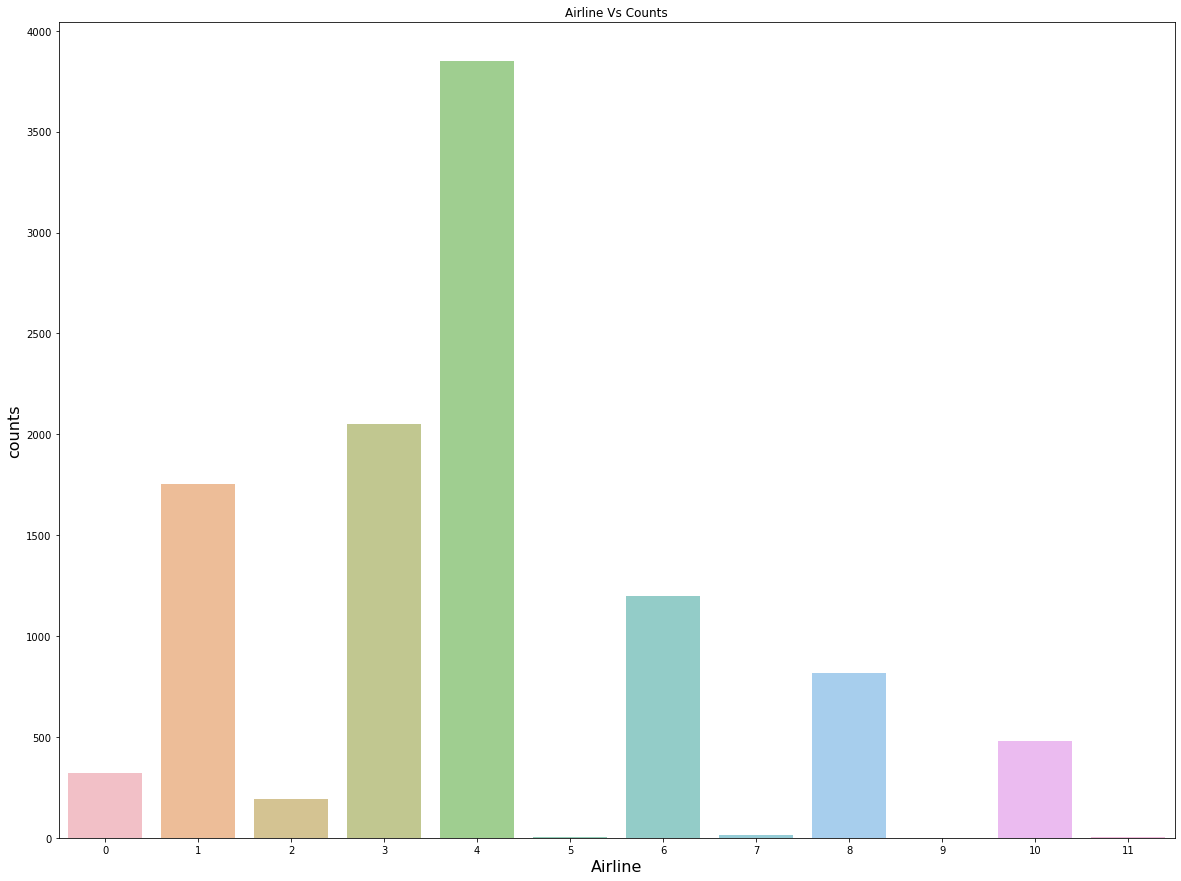

In [37]:
#Let's visualized it thorugh bargraph.

plt.figure(figsize=(20,15))
sns.barplot(data.index,data.values,alpha=0.6)
plt.xlabel('Airline', fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('Airline Vs Counts')
plt.show()

In [38]:
df['Price'].value_counts()  #storing values in data 

10262    258
10844    212
7229     162
4804     160
4823     131
14714    109
3943     104
15129     93
3841      91
12898     86
3597      86
14781     84
9663      84
3873      80
12373     77
14151     74
8586      70
4174      69
5678      65
10368     63
6442      60
8016      60
3100      58
11087     57
14571     57
13014     57
13941     57
2754      56
4423      53
4544      51
14388     49
13377     49
4668      49
7832      47
3543      45
3419      43
8372      43
13067     42
13587     42
7480      41
7064      40
2227      40
13376     39
8040      39
9646      38
4049      38
6961      37
15554     36
13292     36
1965      36
16079     36
2017      35
4995      35
13817     35
4878      34
13029     33
5228      32
4148      32
14871     31
3383      31
12692     30
6093      30
4591      29
5403      29
4409      29
3625      29
4030      29
11467     29
5192      28
8452      28
6795      27
6144      27
8610      27
13727     26
7408      26
8529      26
9314      25

In [39]:
data = df['Price'].value_counts()  #storing values in data 

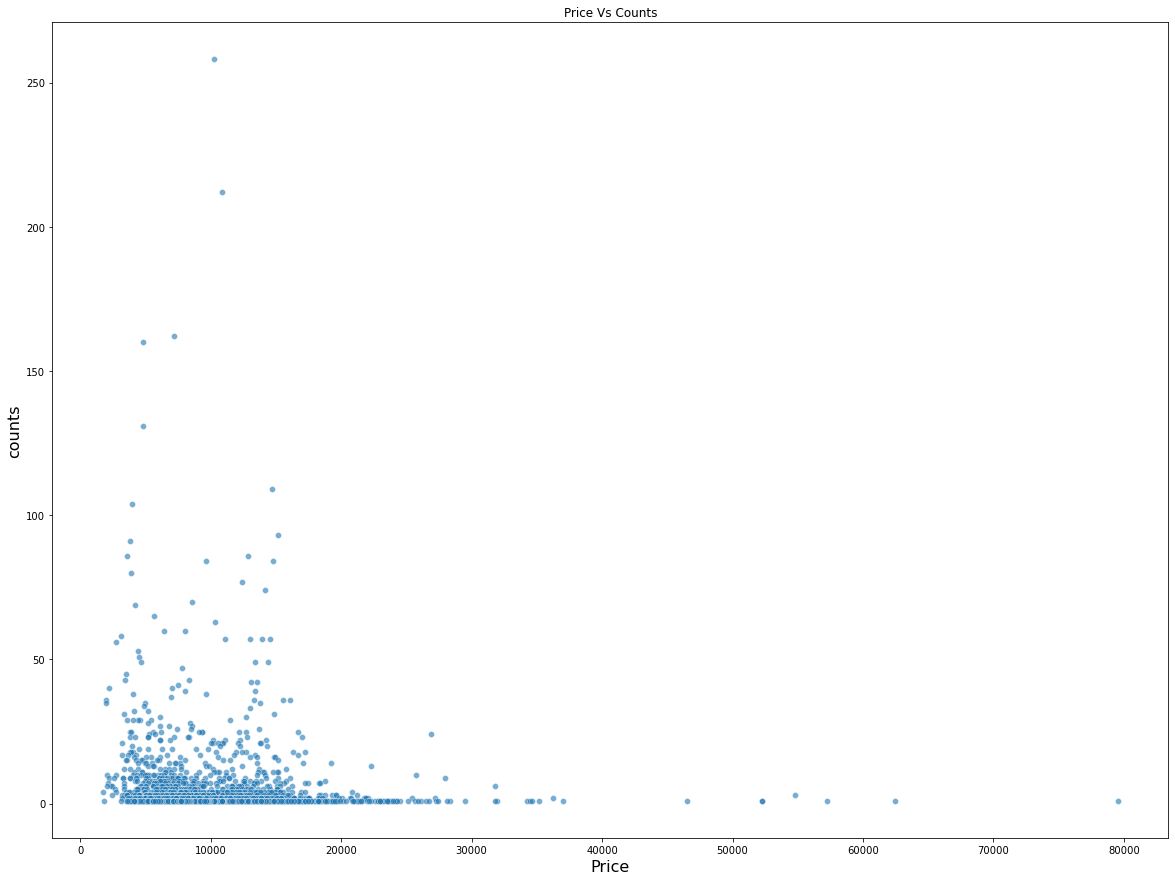

In [40]:
#Let's visualized it thorugh bargraph.

plt.figure(figsize=(20,15))
sns.scatterplot(data.index,data.values,alpha=0.6)
plt.xlabel('Price', fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('Price Vs Counts')
plt.show()

# Step No 3. Data description

In [41]:
df.describe()  #statstical summary

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10682.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,107.980717,869.828419,194.069269,1.497379,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,61.085563,331.509504,108.620556,1.102143,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,96.000000,937.000000,233.000000,2.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,164.000000,1141.000000,280.000000,2.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,221.000000,1342.000000,367.000000,5.000000,9.000000,79512.000000


Describe method gives stastical details like count, mean, std, min, max, 25%, 50%, 75%.
Above outcome shows, There are outiler present in dataset by comparing mean and 50% value. There is major difference between them like in Destination,Dep_Time, Arrival_Time, Duration, Total_Stops and Price etc .

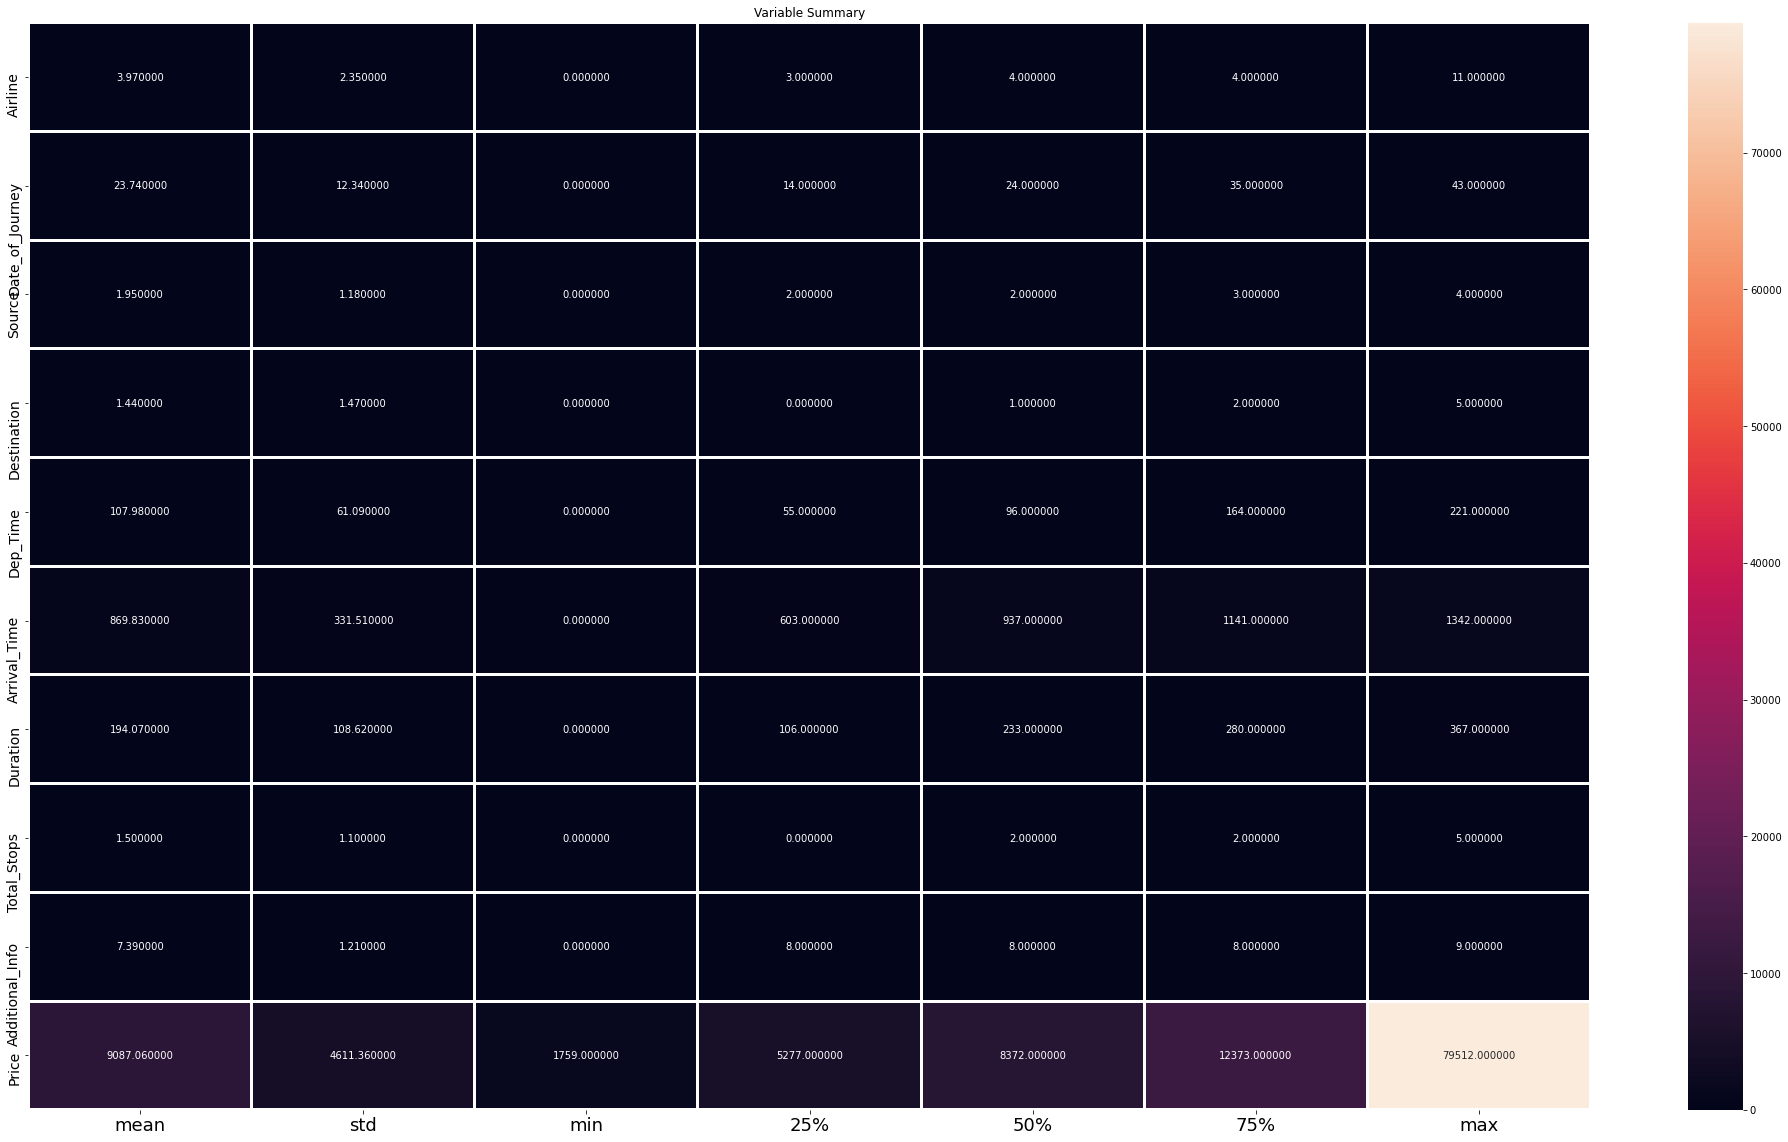

In [42]:
#lets visulized dataset

plt.figure(figsize=(35,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable Summary")
plt.show()

Above outcome helps to understand relation between various varibales better.

In [43]:
corr_mat = df.corr() # Checking for correlation

In [44]:
corr_mat

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,-0.039439,-0.015733,0.027917,-0.158383,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,-0.007836,-0.012507,-0.001168,0.057434,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.055191,0.020844,-0.192009,0.215722,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.063608,-0.036830,0.022037,-0.327977,0.026806,-0.071112
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,1.000000,-0.023294,0.041619,-0.063521,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,-0.023294,1.000000,0.027746,0.065081,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,0.041619,0.027746,1.000000,-0.185351,0.080151,-0.144270
Total_Stops,-0.158383,0.057434,0.215722,-0.327977,-0.063521,0.065081,-0.185351,1.000000,-0.114382,0.631210
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,-0.052853,0.017505,0.080151,-0.114382,1.000000,-0.065478
Price,-0.039520,-0.036942,0.015998,-0.071112,0.002949,0.027377,-0.144270,0.631210,-0.065478,1.000000


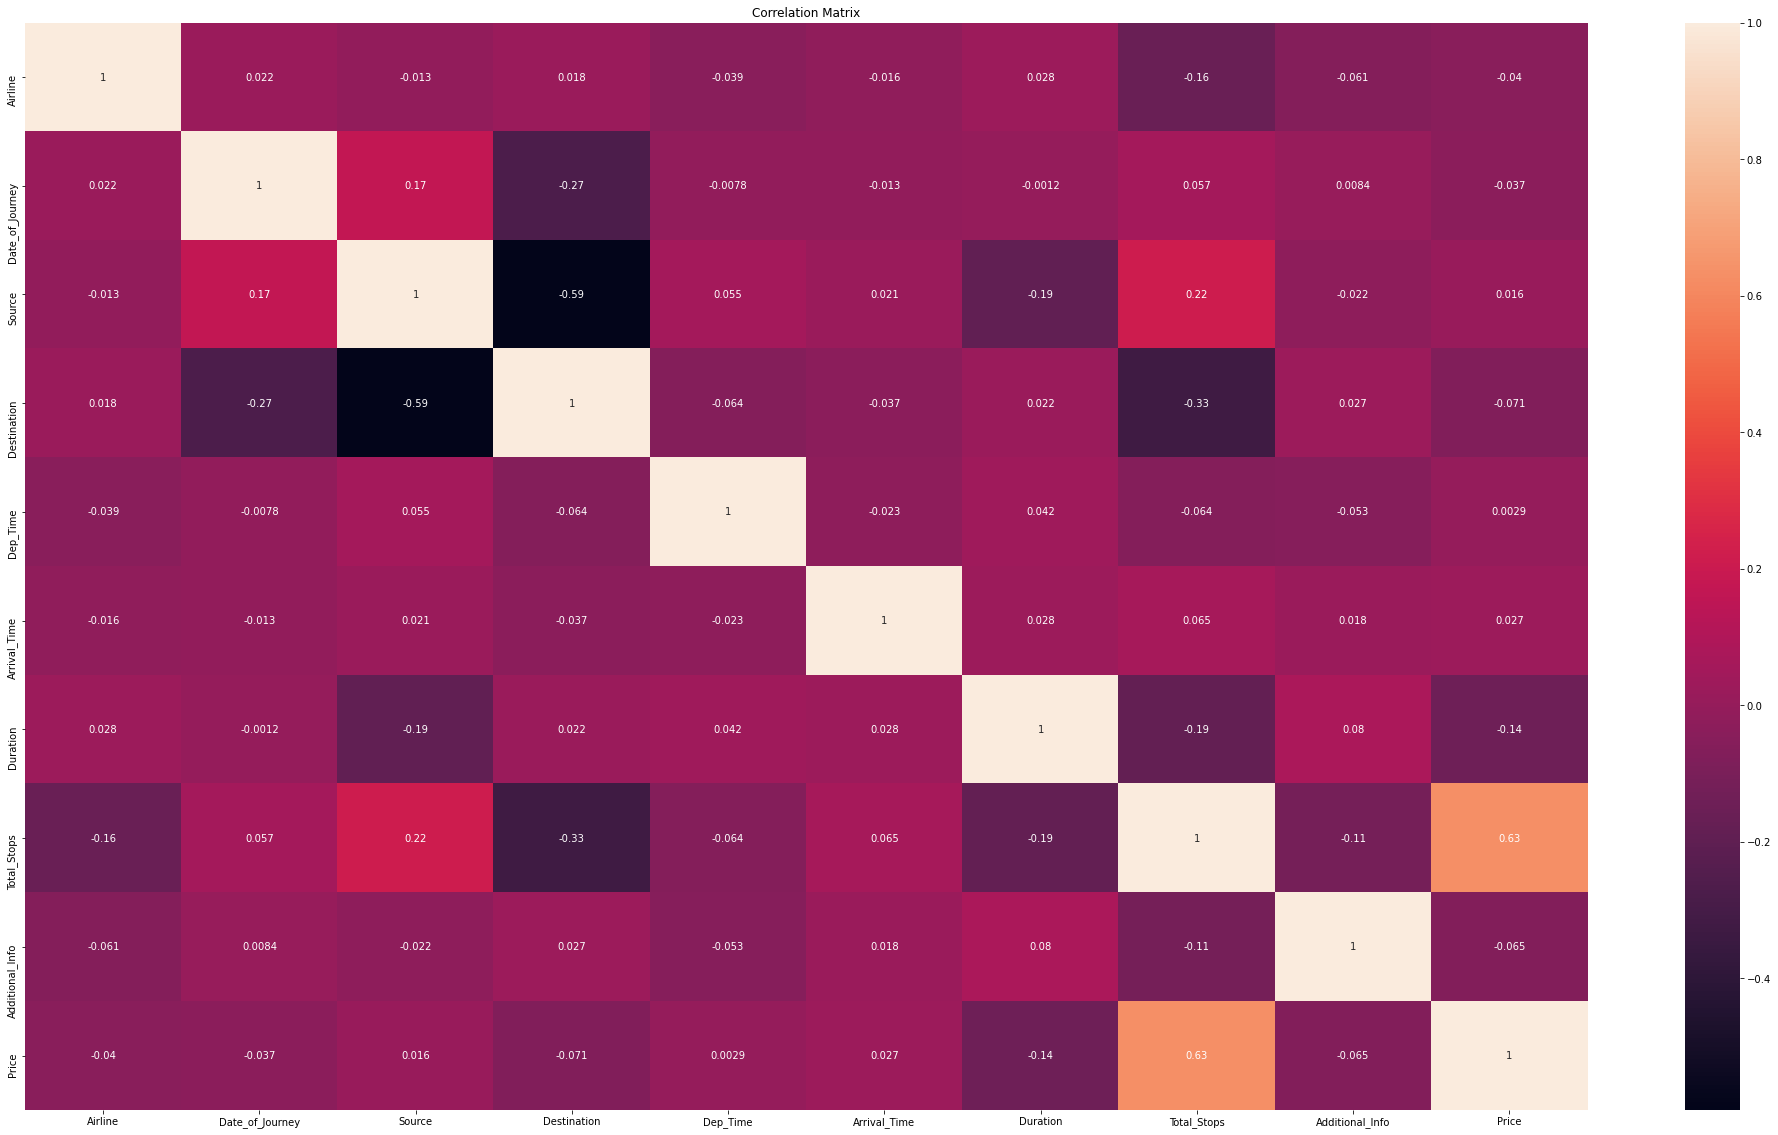

In [46]:
# visulization of correlated values.

plt.figure(figsize=(35,20))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

All columns of database are positively correlated.
Airline has -4%, Date_of_journey has -3.7%, Source has 1.6%, Destination has -7.1%, Dep_Time has 0.29%, Arrival_Time has 2.7%, Duration has -1.4%, Total_Stops has 63%, Additional_info has -6.5%  with target value. 
Max Correlation: Total_Stops
Min Correlation: Destination

# Step 4. Data standarization and normalization

Airline               AxesSubplot(0.125,0.799681;0.110714x0.0803191)
Date_of_Journey    AxesSubplot(0.257857,0.799681;0.110714x0.0803191)
Source             AxesSubplot(0.390714,0.799681;0.110714x0.0803191)
Destination        AxesSubplot(0.523571,0.799681;0.110714x0.0803191)
Dep_Time           AxesSubplot(0.656429,0.799681;0.110714x0.0803191)
Arrival_Time       AxesSubplot(0.789286,0.799681;0.110714x0.0803191)
Duration              AxesSubplot(0.125,0.703298;0.110714x0.0803191)
Total_Stops        AxesSubplot(0.257857,0.703298;0.110714x0.0803191)
Additional_Info    AxesSubplot(0.390714,0.703298;0.110714x0.0803191)
Price              AxesSubplot(0.523571,0.703298;0.110714x0.0803191)
dtype: object

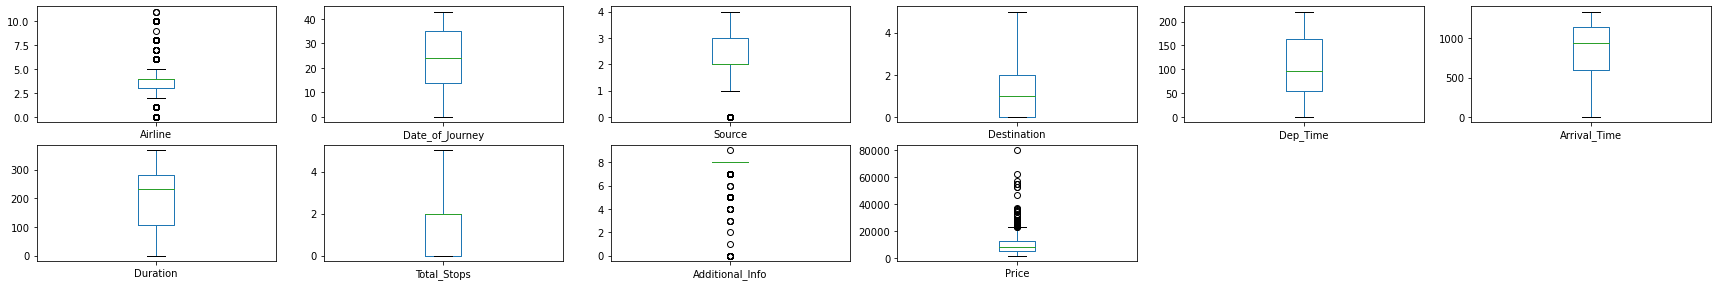

In [47]:
df.plot(kind='box',subplots =True, layout=(8,6),figsize=(30,20))

Above both outcome show outlier present in columns.

In [48]:
df.skew() #to check skewness

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops       -0.356786
Additional_Info   -1.779838
Price              1.812552
dtype: float64

#Normalized data range has skewnees ranges between +0.5 to -0.5.

Columns has skewness - Airline, Destination, Arrival_Time, Additional_Info and Price. 

Let's visualized skewness with help of distplot.

<AxesSubplot:xlabel='Airline', ylabel='Density'>

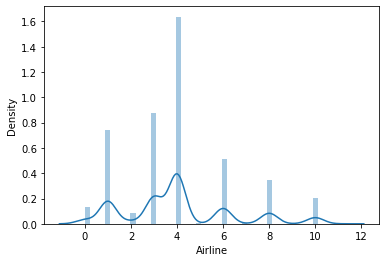

In [49]:
sns.distplot(df['Airline'])

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Density'>

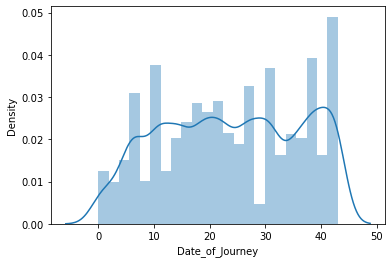

In [50]:
sns.distplot(df['Date_of_Journey'])

<AxesSubplot:xlabel='Source', ylabel='Density'>

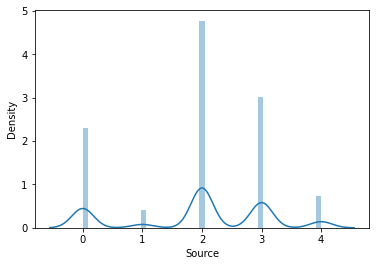

In [51]:
sns.distplot(df['Source'])

<AxesSubplot:xlabel='Destination', ylabel='Density'>

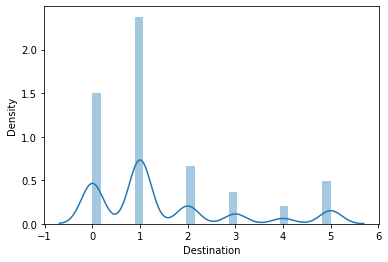

In [52]:
sns.distplot(df['Destination'])

<AxesSubplot:xlabel='Dep_Time', ylabel='Density'>

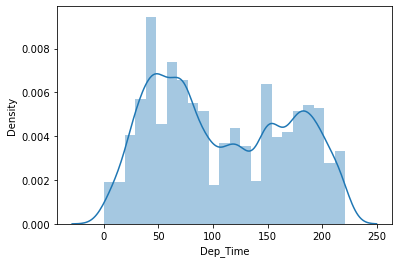

In [53]:
sns.distplot(df['Dep_Time'])

<AxesSubplot:xlabel='Arrival_Time', ylabel='Density'>

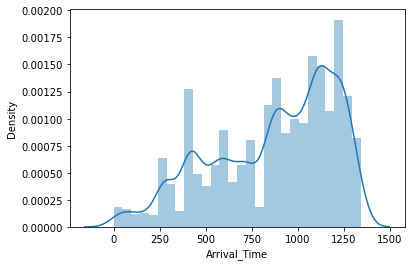

In [54]:
sns.distplot(df['Arrival_Time'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

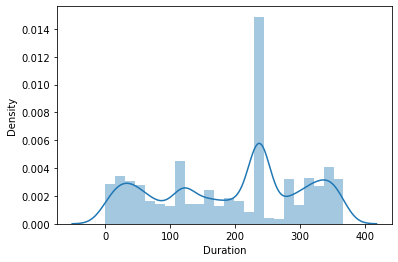

In [55]:
sns.distplot(df['Duration'])

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

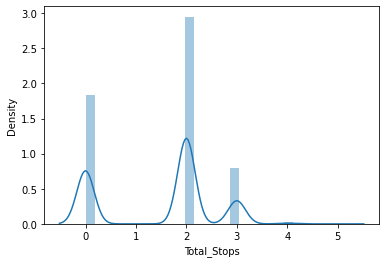

In [56]:
sns.distplot(df['Total_Stops'])

<AxesSubplot:xlabel='Additional_Info', ylabel='Density'>

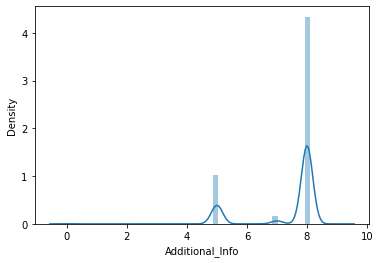

In [57]:
sns.distplot(df['Additional_Info'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

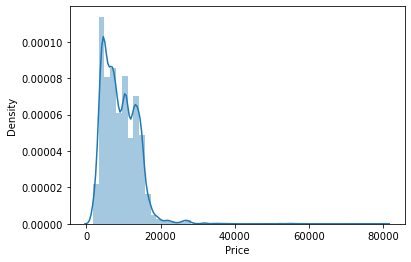

In [58]:
sns.distplot(df['Price'])

In [59]:
from scipy.stats import zscore 
from scipy import stats    #Importing requried library.
z = np.abs(stats.zscore(df))
z.shape

(10683, 10)

In [60]:
index = (np.where(z>6)[0])
df = df.drop(df.index[index])
df.shape

(10654, 10)

After applying zscore method, We got new dataset with 10654 rows and 10 columns.

In [61]:
loss_percent=(10683-10654)/10683*100
print(loss_percent) 

0.2714593279041468


In [69]:
df = df.drop(columns=['Date_of_Journey']) #removing unnecessary columns

In [70]:
df = df.drop(columns=['Dep_Time']) #removing unnecessary columns

In [71]:
df = df.drop(columns=['Arrival_Time']) #removing unnecessary columns

In [72]:
df = df.drop(columns=['Duration']) #removing unnecessary columns

In [73]:
df = df.drop(columns=['Additional_Info']) #removing unnecessary columns

After removing skewness - total data lost is 0.2714%.

# Step 5. Creation of train and test data sets using optimum parameters

In [74]:
#splitting dataset into x and y.

y = df['Price']
x = df.drop(columns=['Price'])

In [75]:
x.head()

,Airline,Source,Destination,Total_Stops
0,3,0,5,0.0
1,1,3,0,3.0
2,4,2,1,3.0
3,3,3,0,2.0
4,3,0,5,2.0


In [76]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [77]:
# Data Scaling
#StandardScaler = (X-mean)/std
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.41059409, -1.66544076,  2.43571482, -1.35600806],
       [-1.26033563,  0.88784098, -0.97365871,  1.36358162],
       [ 0.01427668,  0.03674706, -0.29178401,  1.36358162],
       ...,
       [ 0.01427668, -1.66544076,  0.3900907 , -1.35600806],
       [ 2.56350129, -1.66544076,  2.43571482, -1.35600806],
       [-1.26033563,  0.03674706, -0.29178401,  1.36358162]])

In [78]:
# Split data into train and test. Model will be built on training data and tested on test data
from sklearn.model_selection import train_test_split  #importing requried lib.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)
y_train

2493     13029
3008      5975
1918     26890
1586      5073
4186      6412
7177     10123
6966      4804
9446      4409
1491      4544
5518      4804
3384      3175
7796      9416
2858     14781
5041      3419
5250      8236
6425     11678
3638     17267
9424      7229
8703     11467
1471     12192
7822      6878
8202      9626
3568     14960
1993      7408
4339     14441
1879     13014
8538     10368
3194      9794
2074      7155
201       6961
3749      2754
7092      3841
2496      3841
381      15129
4663      5899
8911      5192
2542     14714
1774      6093
9757     13817
7180     14714
8815      9450
150       3873
7771     10844
9869      8603
5817      7878
1274      3739
1256     14151
9302      9345
4155      4784
1236      6121
10380     7222
9021     13817
8741      6805
7450      4423
1720      6208
6907      4174
609      12373
4646      7198
7582      7155
2999     13882
4943      3384
1361      6386
6035     11853
6556      6195
2519     10844
7513      6961
7337     1

# Step 6. Model training using ML algorithm

Model No. 1 Linear Regression

In [79]:
# Model instantiating and training. As the label data is contineous so we can used linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,roc_auc_score


In [80]:
regression = LinearRegression()
regression.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').